# BIBLIOTECAS

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pingouin as pg

# DADOS HISTÓRICOS

In [148]:
dados_historicos = pd.read_csv('previsao_vv_2017-2023.csv', sep = ';')
dados_historicos.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,14/02/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15/02/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16/02/2017,NaN,NaN,NaN,NaN,NaN,NaN,"67,8",48.0,"6,6",NaN
3,17/02/2017,0,"1011,2","21,7","32,4","26,5","21,8","76,7",47.0,"9,5","2,4"
4,18/02/2017,0,"1010,9","21,4","33,8","26,8",21,"74,3",41.0,"11,5","3,3"


In [149]:
# Converter todas as colunas exceto 'Data Medicao' para float
COL_DATA = "Data Medicao"
cols_num = [c for c in df0.columns if c != COL_DATA]

# Limpeza comum + conversão para float
dados_historicos[cols_num] = (
    dados_historicos[cols_num]
      .apply(lambda s: pd.to_numeric(
          s.astype(str)
           .str.strip()                       # tira espaços
           .str.replace('\u2212', '-', regex=False)  # hífen unicode → '-'
           .str.replace(r'\.(?=\d{3}(?:\D|$))','', regex=True)  # remove ponto de milhar
           .str.replace(',', '.', regex=False),        # vírgula → ponto
          errors='coerce'                    # não-numéricos viram NaN
      ))
)

# Converter a coluna para datetime (dia primeiro)
dados_historicos['Data Medicao'] = pd.to_datetime(dados_historicos['Data Medicao'], dayfirst=True)

# DADOS 2024

In [150]:
df = pd.read_csv('previsao_vv_2024.csv', sep = ';')
df.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,01/01/2024,1,"1010,4","20,6","24,7",23,"22,1","86,8",76,"10,6","3,2"
1,02/01/2024,"7,4","1008,8","21,8","28,7","24,1","21,8","87,9",67,"5,7","1,6"
2,03/01/2024,1,"1008,1","23,2","29,7","25,6","23,5","87,5",62,"9,7","2,8"
3,04/01/2024,"1,2",1006,"23,9","30,4","25,7","24,3","90,7",66,"7,6","2,7"
4,05/01/2024,"13,6",1005,"22,6","29,4",25,"22,9","87,2",70,"7,5","1,5"


In [151]:
# Converter todas as colunas exceto 'Data Medicao' para float
COL_DATA = "Data Medicao"
cols_num = [c for c in df.columns if c != COL_DATA]

# Limpeza comum + conversão para float
df[cols_num] = (
    df[cols_num]
      .apply(lambda s: pd.to_numeric(
          s.astype(str)
           .str.strip()                       # tira espaços
           .str.replace('\u2212', '-', regex=False)  # hífen unicode → '-'
           .str.replace(r'\.(?=\d{3}(?:\D|$))','', regex=True)  # remove ponto de milhar
           .str.replace(',', '.', regex=False),        # vírgula → ponto
          errors='coerce'                    # não-numéricos viram NaN
      ))
)

# Converter a coluna para datetime (dia primeiro)
df['Data Medicao'] = pd.to_datetime(df['Data Medicao'], dayfirst=True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Data Medicao                                            366 non-null    datetime64[ns]
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                    331 non-null    float64       
 2   PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)              337 non-null    float64       
 3   TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)  337 non-null    float64       
 4   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                    337 non-null    float64       
 5   TEMPERATURA MEDIA, DIARIA (AUT)(°C)                     331 non-null    float64       
 6   TEMPERATURA MINIMA, DIARIA (AUT)(°C)                    337 non-null    float64       
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)           340 no

In [153]:
#colunas numéricas do dataset
numdf = df.select_dtypes(include=['float64', 'int64'])
numdf.head()

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,1.0,1010.4,20.6,24.7,23.0,22.1,86.8,76,10.6,3.2
1,7.4,1008.8,21.8,28.7,24.1,21.8,87.9,67,5.7,1.6
2,1.0,1008.1,23.2,29.7,25.6,23.5,87.5,62,9.7,2.8
3,1.2,1006.0,23.9,30.4,25.7,24.3,90.7,66,7.6,2.7
4,13.6,1005.0,22.6,29.4,25.0,22.9,87.2,70,7.5,1.5


# VALORES NULOS

In [154]:
def mostra_nulos(df):
#Retorna uma tabela com o nome das colunas que possuem valores nulos,
#quantidade de valores nulos, e o percentual de valores nulos sobre o total da variável

  #valores nulos
  total_nulos = df.isnull().sum().sort_values(ascending=False)
  #filtrando colunas que possuem valores nulos
  colunas_com_nulos = total_nulos[total_nulos > 0]
  #porcentagem de valores nulos por coluna
  porcentagem_nulos = (df.isnull().sum() / len(df) * 100).round(2)
  #dataframe
  df_nulos = pd.DataFrame({
          'Colunas': colunas_com_nulos.index,
          'Qtde Nulos': colunas_com_nulos.values,
          'Porcentagem Nulos': porcentagem_nulos[colunas_com_nulos.index].values
      })
  return df_nulos

mostra_nulos(df)

,Colunas,Qtde Nulos,Porcentagem Nulos
0,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",35,9.56
1,"TEMPERATURA MEDIA, DIARIA (AUT)(°C)",35,9.56
2,PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),29,7.92
3,TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (...,29,7.92
4,"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)",29,7.92
5,"TEMPERATURA MINIMA, DIARIA (AUT)(°C)",29,7.92
6,"VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",29,7.92
7,"VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)",27,7.38
8,"UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)",26,7.10


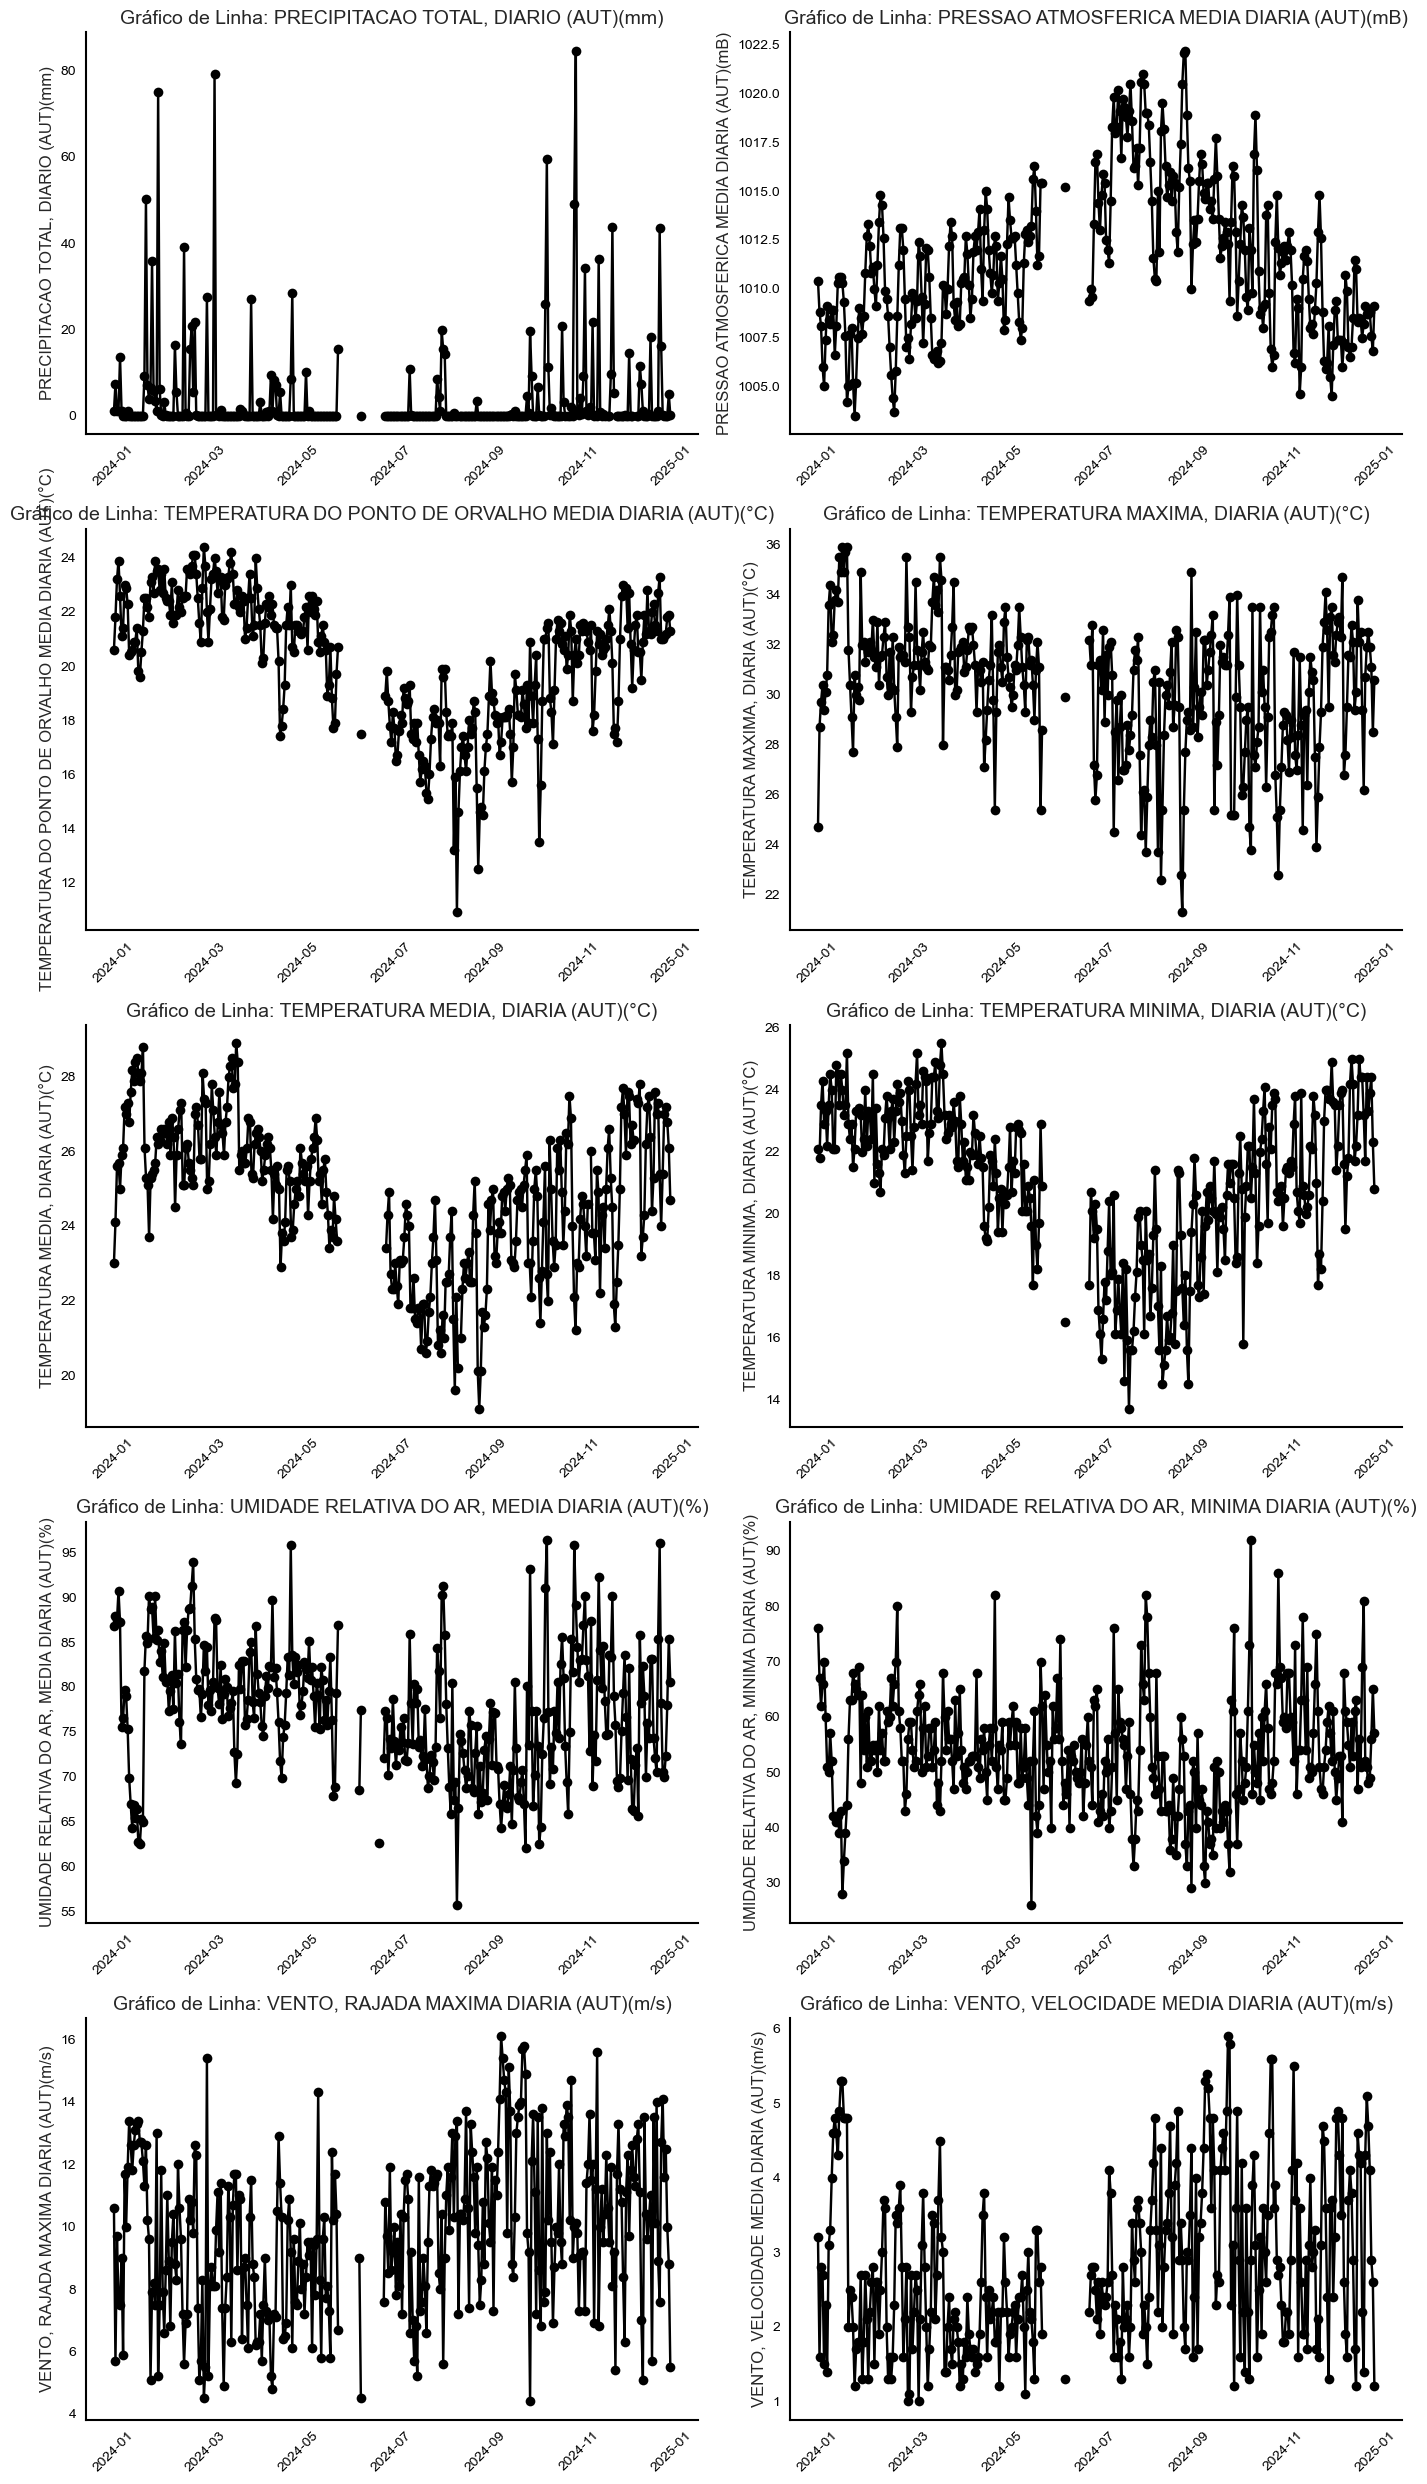

In [155]:
# Converter a coluna 'Data Medicao' para o formato de data
df['Data Medicao'] = pd.to_datetime(df['Data Medicao'])

# Definir as colunas para plotar
colunas_para_plotar = numdf.columns

# Definir o número de colunas por linha (2 gráficos por linha)
n_colunas = 2
n_linhas = (len(colunas_para_plotar) + 1) // 2

# Criar figura com subplots
fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(14, 5 * n_linhas))
axes = axes.flatten()

# Plotar os gráficos
for i, coluna in enumerate(colunas_para_plotar):
    ax = axes[i]
    ax.plot(df['Data Medicao'], df[coluna], marker='o', color='black')

    # Título e rótulos
    ax.set_title(f'Gráfico de Linha: {coluna}', fontdict={'family': 'Arial', 'size': 14})
    ax.set_ylabel(coluna, fontdict={'family': 'Arial', 'size': 12})

    # Estilo dos eixos
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1.5)

    # Ticks pretos
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

    # Sem grade
    ax.grid(False)

    # Rotacionar labels do eixo x
    ax.tick_params(axis='x', rotation=45)

# Remover eixos vazios, se houver
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Layout ajustado
plt.tight_layout()
plt.show()

In [156]:
# Anos considerados e intervalo desejado
anos = list(range(2017, 2024))
inicio_md = (5, 28)   # mês, dia
fim_md    = (6, 26)

# Lista para armazenar medianas diárias por ano
diarias_anos = []

for y in anos:
    ini = pd.Timestamp(y, *inicio_md)
    fim = pd.Timestamp(y, *fim_md)

    dfx = dados_historicos[(dados_historicos['Data Medicao'] >= ini) & (dados_historicos['Data Medicao'] <= fim)].copy()
    if dfx.empty:
        continue

    # Normalizar a data (sem hora)
    dfx['Data'] = dfx['Data Medicao'].dt.normalize()

    # Mediana diária dentro do ano (se houver mais de uma medição por dia)
    med_dia = (
        dfx.groupby('Data')
           .apply(lambda g: g.select_dtypes(include='number').median())
           .reset_index()
    )

    # Criar chave dia/mês
    med_dia['dia_mes'] = med_dia['Data'].dt.strftime('%m-%d')

    # Não precisamos mais da coluna 'Data' aqui
    diarias_anos.append(med_dia.drop(columns=['Data']))

# Concatenar todas as medianas diárias dos anos
df_all = pd.concat(diarias_anos, ignore_index=True)

# Mediana entre anos para cada dia/mês
mediana_climatologica = (
    df_all.groupby('dia_mes')
          .median(numeric_only=True)
          .sort_index()
)

# Criar uma data de referência para facilitar gráficos (usando 2024 como base)
ref_year = 2024
mediana_climatologica = mediana_climatologica.reset_index()
mediana_climatologica['Data_Ref'] = pd.to_datetime(
    f"{ref_year}-" + mediana_climatologica['dia_mes'],
    format='%Y-%m-%d'
)

# Organizar resultado final
mediana_climatologica = (
    mediana_climatologica
    .set_index('Data_Ref')
    .drop(columns=['dia_mes'])
)

print("Mediana diária (28/05–26/06) calculada entre 2020–2023:")
print(mediana_climatologica.head())

Mediana diária (28/05–26/06) calculada entre 2020–2023:
            PRECIPITACAO TOTAL, DIARIO (AUT)(mm)  \
Data_Ref                                           
2024-05-28                                   0.0   
2024-05-29                                   0.0   
2024-05-30                                   0.0   
2024-05-31                                   0.0   
2024-06-01                                   0.0   

            PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)  \
Data_Ref                                                 
2024-05-28                                      1014.6   
2024-05-29                                      1012.3   
2024-05-30                                      1014.1   
2024-05-31                                      1013.1   
2024-06-01                                      1012.2   

            TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)  \
Data_Ref                                                             
2024-05-28                      

C:\Users\Matheus\AppData\Local\Temp\ipykernel_11316\2751596435.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.select_dtypes(include='number').median())
C:\Users\Matheus\AppData\Local\Temp\ipykernel_11316\2751596435.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.select_dtypes(include='number').median())
C:\Users\Matheus\AppData\Local\Temp\ipykernel_11316\2751

In [157]:
# Garantir datetime
df['Data Medicao'] = pd.to_datetime(df['Data Medicao'])

# --- Janela de 2024
inicio_2024 = pd.to_datetime("28/05/2024", dayfirst=True)
fim_2024    = pd.to_datetime("26/06/2024", dayfirst=True)
mask_2024 = (df['Data Medicao'] >= inicio_2024) & (df['Data Medicao'] <= fim_2024)

# --- Medianas diárias já calculadas entre anos e trazidas para 2024
# Assume-se que 'mediana_climatologica' está indexado por datas de 2024 (28/05–26/06/2024)
# e possui apenas colunas numéricas com as medianas (uma por variável).
medianas_2024 = mediana_climatologica.copy()  # index: datas de 2024

# --- Preencher somente NaNs de 2024 com a mediana do mesmo dia
df_2024 = df.loc[mask_2024].copy()
df_2024['DataKey'] = df_2024['Data Medicao'].dt.normalize()

# Limitar às colunas numéricas presentes nas medianas
num_cols = [c for c in df_2024.select_dtypes(include='number').columns if c in medianas_2024.columns]

for col in num_cols:
    # mapeia cada linha à mediana do respectivo dia
    mapa_mediana = df_2024['DataKey'].map(medianas_2024[col])
    df_2024[col] = df_2024[col].fillna(mapa_mediana)

# Remover chave auxiliar e gravar de volta
df_2024 = df_2024.drop(columns=['DataKey'])
df.loc[mask_2024, df_2024.columns] = df_2024

In [158]:
def mostra_nulos(df):
#Retorna uma tabela com o nome das colunas que possuem valores nulos,
#quantidade de valores nulos, e o percentual de valores nulos sobre o total da variável

  #valores nulos
  total_nulos = df.isnull().sum().sort_values(ascending=False)
  #filtrando colunas que possuem valores nulos
  colunas_com_nulos = total_nulos[total_nulos > 0]
  #porcentagem de valores nulos por coluna
  porcentagem_nulos = (df.isnull().sum() / len(df) * 100).round(2)
  #dataframe
  df_nulos = pd.DataFrame({
          'Colunas': colunas_com_nulos.index,
          'Qtde Nulos': colunas_com_nulos.values,
          'Porcentagem Nulos': porcentagem_nulos[colunas_com_nulos.index].values
      })
  return df_nulos

mostra_nulos(df)

,Colunas,Qtde Nulos,Porcentagem Nulos
0,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",6,1.64
1,"TEMPERATURA MEDIA, DIARIA (AUT)(°C)",5,1.37


In [159]:
# Interpolação temporal para preencher valores nulos
df.interpolate(method='linear', inplace=True)

In [160]:
# Verificar se há valores nulos restantes após a interpolação
print(df.isnull().sum())

Data Medicao                                              0
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                      0
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                0
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)    0
TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                      0
TEMPERATURA MEDIA, DIARIA (AUT)(°C)                       0
TEMPERATURA MINIMA, DIARIA (AUT)(°C)                      0
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)             0
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)            0
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                    0
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                 0
dtype: int64


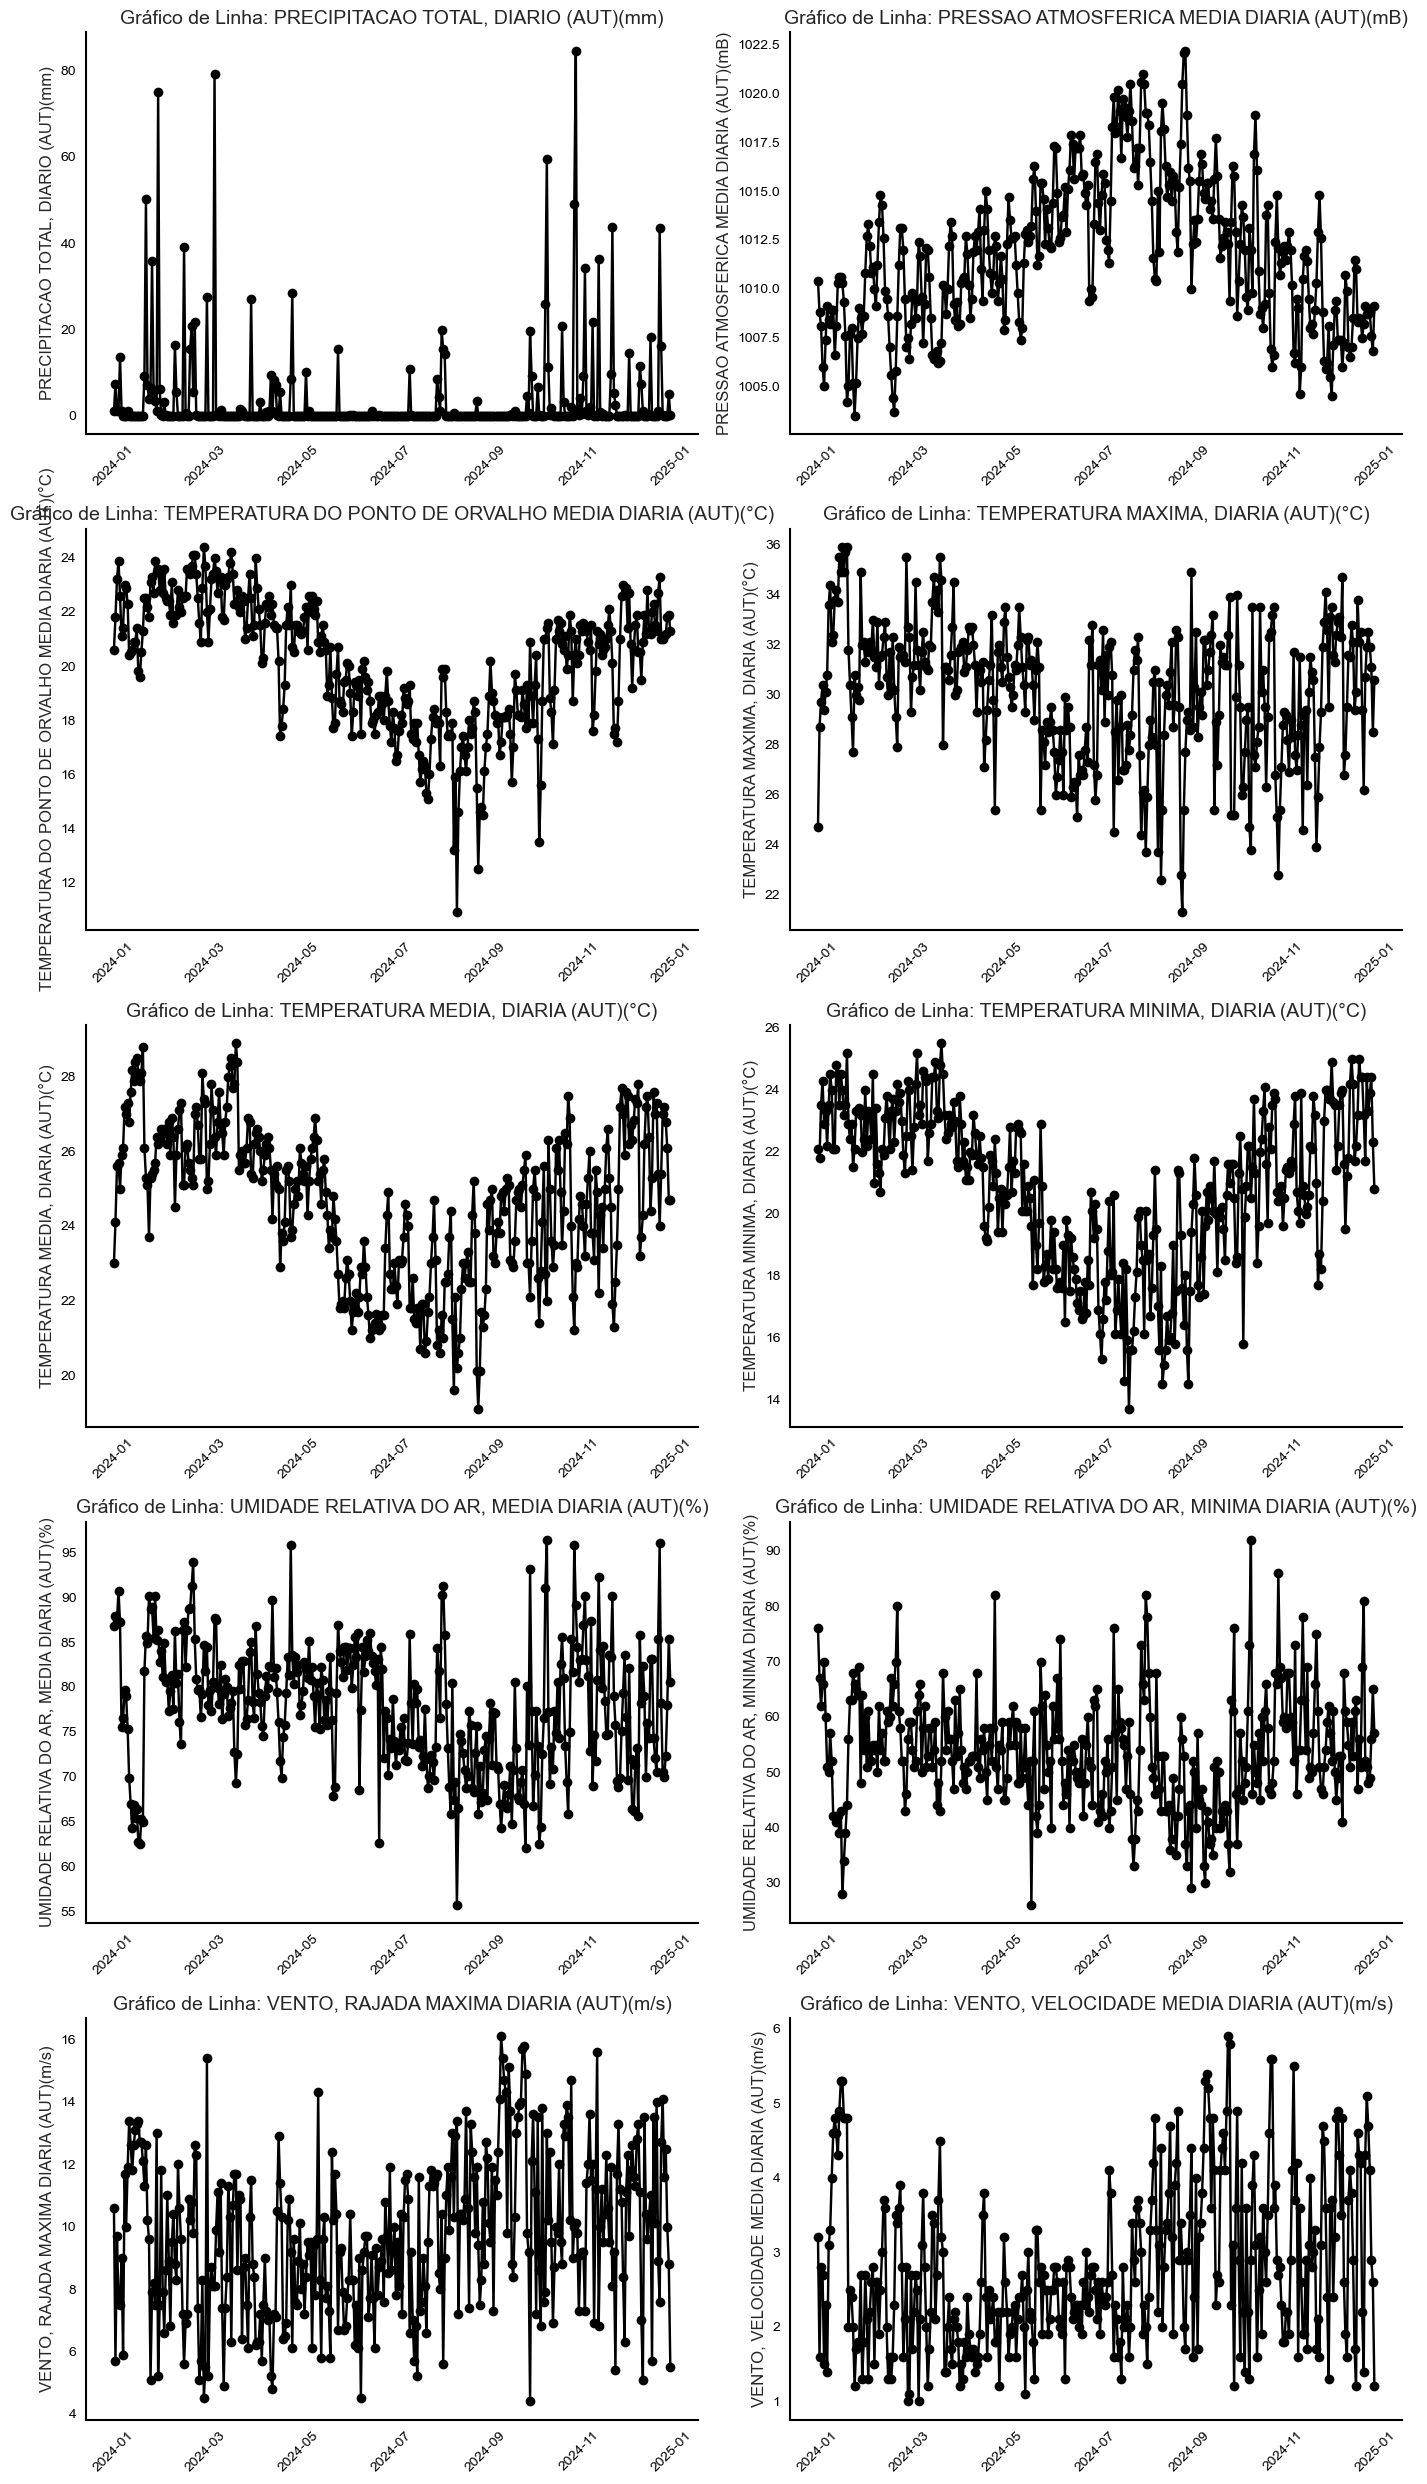

In [161]:
# Converter a coluna 'Data Medicao' para o formato de data
df['Data Medicao'] = pd.to_datetime(df['Data Medicao'])

# Definir as colunas para plotar
colunas_para_plotar = numdf.columns

# Definir o número de colunas por linha (2 gráficos por linha)
n_colunas = 2
n_linhas = (len(colunas_para_plotar) + 1) // 2

# Criar figura com subplots
fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(14, 5 * n_linhas))
axes = axes.flatten()

# Plotar os gráficos
for i, coluna in enumerate(colunas_para_plotar):
    ax = axes[i]
    ax.plot(df['Data Medicao'], df[coluna], marker='o', color='black')

    # Título e rótulos
    ax.set_title(f'Gráfico de Linha: {coluna}', fontdict={'family': 'Arial', 'size': 14})
    ax.set_ylabel(coluna, fontdict={'family': 'Arial', 'size': 12})

    # Estilo dos eixos
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1.5)

    # Ticks pretos
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

    # Sem grade
    ax.grid(False)

    # Rotacionar labels do eixo x
    ax.tick_params(axis='x', rotation=45)

# Remover eixos vazios, se houver
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Layout ajustado
plt.tight_layout()
plt.show()

# PADRONIZAÇÃO

In [162]:
#padronizando os dados
numdf = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(numdf)
paddf = pd.DataFrame(dados_padronizados, columns=numdf.columns)
paddf.head()

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,-0.231862,-0.370393,0.187269,-2.042995,-0.772512,0.490115,1.281647,2.221703,0.366282,0.399495
1,0.367602,-0.788800,0.697814,-0.534094,-0.234333,0.372023,1.437427,1.325623,-1.593415,-1.094402
2,-0.231862,-0.971854,1.293449,-0.156868,0.499546,1.041212,1.380780,0.827800,0.006338,0.026021
3,-0.213129,-1.521013,1.591266,0.107190,0.548471,1.356125,1.833959,1.226058,-0.833532,-0.067348
4,0.948332,-1.782518,1.038176,-0.270036,0.205994,0.805028,1.338294,1.624316,-0.873526,-1.187771


In [163]:
# Calcular a média de cada coluna
medias_pad = paddf.mean().round(0)

# Calcular o desvio padrão de cada coluna
desvios_pad = paddf.std().round(0)

# Exibir os resultados
print("Médias Dados Padronizados:")
print(medias_pad)

print("\nDesvios Padrão Dados Padronizados:")
print(desvios_pad)

Médias Dados Padronizados:
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                     -0.0
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)               -0.0
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)   -0.0
TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                      0.0
TEMPERATURA MEDIA, DIARIA (AUT)(°C)                       0.0
TEMPERATURA MINIMA, DIARIA (AUT)(°C)                     -0.0
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)             0.0
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)            0.0
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                    0.0
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                -0.0
dtype: float64

Desvios Padrão Dados Padronizados:
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                      1.0
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                1.0
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)    1.0
TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                      1.0
TEMPERATURA MEDIA, DIARIA (AUT)(°C)                   

# MÉTODO ELBOW

c:\Users\Matheus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Matheus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Matheus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Matheus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

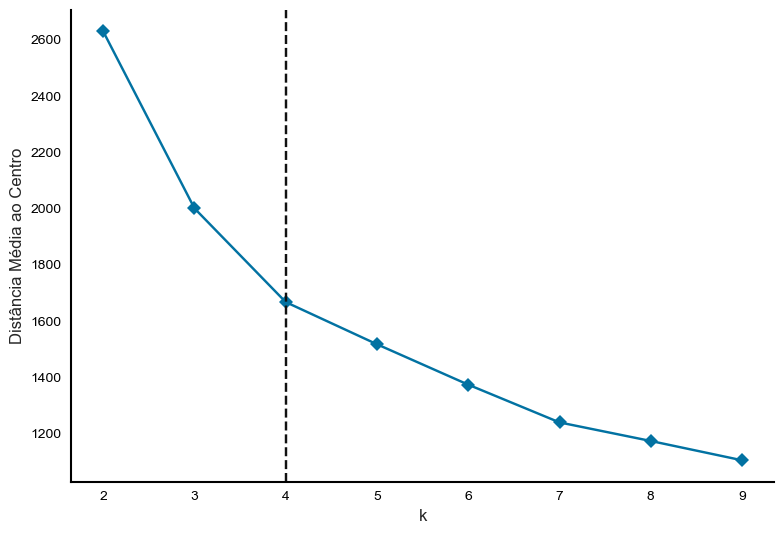

In [164]:
# Criar visualizer com curva verde desativada
visualizer = KElbowVisualizer(
    KMeans(random_state = 9), 
    k=(2, 10), 
    timings=False  # Remove a curva verde (derivada)
)

# Treinar
visualizer.fit(paddf)

# Personalizações
ax = visualizer.ax

# Remover grade
ax.grid(False)

# Remover spines (bordas)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Eixos com cor preta e largura 1.5 pt
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

# Ticks pretos
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Fonte Arial nos eixos
ax.set_xlabel("k", fontdict={'family': 'Arial', 'size': 12})
ax.set_ylabel("Distância Média ao Centro", fontdict={'family': 'Arial', 'size': 12})

# Ajustar layout final
plt.tight_layout()
plt.show()

In [165]:
print(f"Valor do cotovelo: {visualizer.elbow_score_:.2f}")

Valor do cotovelo: 1667.57


In [166]:
# Obter os pontos do gráfico de cotovelo
k_values = visualizer.k_values_
distances = visualizer.k_scores_

# Combinar em uma tabela
df_elbow = pd.DataFrame({
    "k": k_values,
    "Distância Média ao Centro": distances
})

# Visualizar a tabela
print(df_elbow)

   k  Distância Média ao Centro
0  2                2629.946887
1  3                2000.849574
2  4                1667.572428
3  5                1517.544701
4  6                1373.867527
5  7                1239.713277
6  8                1173.689533
7  9                1105.078399


# K-MEANS

In [167]:
#aplicando o método
kmeans = KMeans(n_clusters = 4, random_state = 9)
df['Clusters'] = kmeans.fit_predict(paddf)

c:\Users\Matheus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [168]:
#verificando a coluna 'Clusters' inserida no dataframe
df['Clusters'].unique()

array([1, 0, 3, 2])

# COEFICIENTE DE SILHUETA

In [169]:
silhueta = silhouette_score(paddf, df['Clusters'])
print('Coeficiente de Silhueta:', silhueta)

Coeficiente de Silhueta: 0.2939097523606438


# PCA

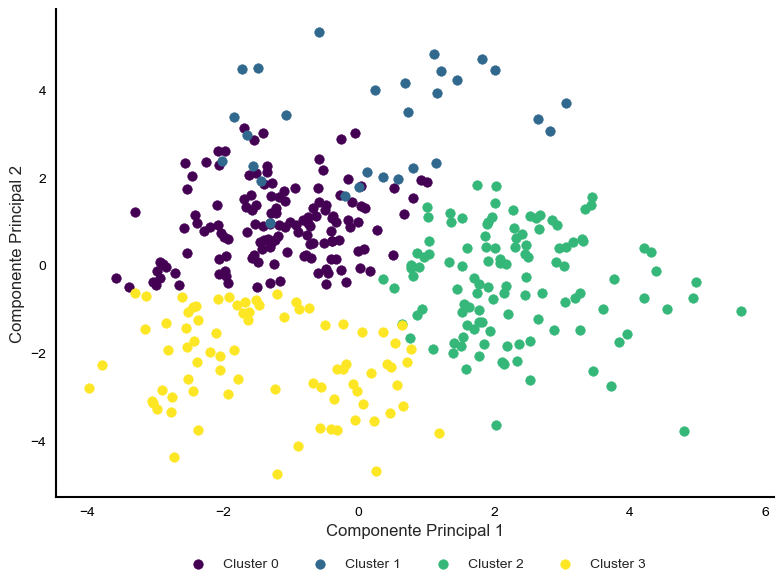

In [170]:
# Reduzir para 2 componentes principais 
pca = PCA(n_components=2)
pca_data = pca.fit_transform(paddf)

plt.figure(figsize=(8,6))
plt.grid(False)

# Cores do cmap viridis
unique_clusters = sorted(df['Clusters'].unique())
colors = cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Plotar cada cluster separadamente com cores viridis
for cluster, color in zip(unique_clusters, colors):
    indices = df['Clusters'] == cluster
    plt.scatter(
        pca_data[indices, 0],
        pca_data[indices, 1],
        label=f'Cluster {cluster}',
        color=color
    )

# Eixos com fonte Arial e tamanho 12
plt.xlabel('Componente Principal 1', fontdict={'family': 'Arial', 'size': 12})
plt.ylabel('Componente Principal 2', fontdict={'family': 'Arial', 'size': 12})

# Legenda tradicional abaixo
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=len(unique_clusters),
    fontsize=12,
    title_fontsize=12,
    prop={'family': 'Arial'},
    frameon=False
)

# Ajuste dos eixos e cores
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Eixos com cor preta e largura 1.5 pt
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

# Ticks dos eixos também em preto
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.tight_layout()
plt.show()

In [171]:
# Calcular silhouette no espaço original
sil_original = silhouette_score(paddf, df['Clusters'], metric='euclidean')

# Calcular silhouette no PCA 2D
sil_pca2d = silhouette_score(pca_data, df['Clusters'], metric='euclidean')

# Mostrar resultados
print(f"Silhouette (original): {sil_original:.4f}")
print(f"Silhouette (PCA 2D):  {sil_pca2d:.4f}")

# Diferença percentual
delta = sil_pca2d - sil_original
print(f"Δ (PCA 2D - original): {delta:.4f} ({(delta/sil_original)*100:.2f}%)")

# Variância explicada pelas duas primeiras PCs
print(f"Variância explicada PC1+PC2: {pca.explained_variance_ratio_.sum():.2%}")

Silhouette (original): 0.2939
Silhouette (PCA 2D):  0.3687
Δ (PCA 2D - original): 0.0748 (25.46%)
Variância explicada PC1+PC2: 72.15%


# ANOVA

In [172]:
# Inicializar um dicionário para armazenar os resultados
resultados_anova = {}

# Executar ANOVA para cada variável numérica
for coluna in numdf:
    anova_resultado = pg.anova(dv=coluna, between='Clusters', data=df, detailed=True).T
    resultados_anova[coluna] = anova_resultado

# Exibir o resultado da ANOVA para todas as variáveis
for coluna, resultado in resultados_anova.items():
    print(f"ANOVA para {coluna}:\n", resultado, "\n")

ANOVA para PRECIPITACAO TOTAL, DIARIO (AUT)(mm):
                    0            1
Source      Clusters       Within
SS      24916.682299  16800.51639
DF                 3          362
MS       8305.560766    46.410266
F         178.959559          NaN
p-unc            0.0          NaN
np2         0.597276          NaN 

ANOVA para PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB):
                   0           1
Source     Clusters      Within
SS      2603.417669  2748.66397
DF                3         362
MS        867.80589    7.592994
F        114.290337         NaN
p-unc           0.0         NaN
np2        0.486431         NaN 

ANOVA para TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C):
                   0           1
Source     Clusters      Within
SS      1299.593816  722.385774
DF                3         362
MS       433.197939    1.995541
F        217.082976         NaN
p-unc           0.0         NaN
np2        0.642733         NaN 

ANOVA para TEMPERATURA MAXIMA, DIARI

In [173]:
for coluna in numdf:
    resT = pg.anova(dv=coluna, between='Clusters', data=df, detailed=True).T
    resultados_anova[coluna] = resT

for coluna, resT in resultados_anova.items():
    f_stat = resT.loc['F', 0]
    p_val  = resT.loc['p-unc', 0]
    print(f"{coluna}: F = {f_stat:.4f}, p-valor = {p_val:.4g}")

PRECIPITACAO TOTAL, DIARIO (AUT)(mm): F = 178.9596, p-valor = 3.78e-71
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB): F = 114.2903, p-valor = 4.419e-52
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C): F = 217.0830, p-valor = 1.508e-80
TEMPERATURA MAXIMA, DIARIA (AUT)(°C): F = 121.9082, p-valor = 1.394e-54
TEMPERATURA MEDIA, DIARIA (AUT)(°C): F = 245.4272, p-valor = 7.129e-87
TEMPERATURA MINIMA, DIARIA (AUT)(°C): F = 177.8619, p-valor = 7.335e-71
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%): F = 163.2442, p-valor = 6.372e-67
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%): F = 98.8153, p-valor = 9.649e-47
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s): F = 63.9223, p-valor = 3.453e-33
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s): F = 164.6666, p-valor = 2.584e-67


# ANÁLISE DOS AGRUPAMENTOS

In [175]:
df['Clusters'].value_counts()

Clusters
0    140
2    117
3     80
1     29
Name: count, dtype: int64

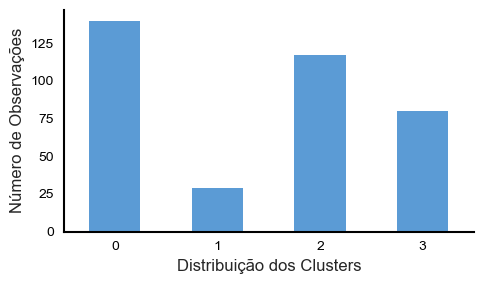

In [176]:
# Contagem por cluster
contagem_clusters = df['Clusters'].value_counts().sort_index()

# Criar gráfico de barras
ax = contagem_clusters.plot(
    kind='bar',
    color='#5b9bd5',
    rot=0,
    figsize=(5, 3)
)

# Eixos com fonte Arial 12 (sem negrito)
plt.xlabel('Distribuição dos Clusters', fontdict={'family': 'Arial', 'size': 12})
plt.ylabel('Número de Observações', fontdict={'family': 'Arial', 'size': 12})

# Remover grade
plt.grid(False)

# Ajustes visuais nos eixos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Cor preta e espessura 1.5 pt nos eixos
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

# Ticks (números dos eixos) também em preto
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.tight_layout()
plt.show()

In [177]:
# Agrupar os dados por cluster e calcular a média para cada variável
medias_por_cluster = df.groupby('Clusters').mean(numeric_only=True)

# Renomear os índices
medias_por_cluster.index = [f'Cluster {i}' for i in medias_por_cluster.index]

# Remover o nome do índice
medias_por_cluster.index.name = None

# Exibir
medias_por_cluster

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
Cluster 0,1.578571,1009.863571,22.061429,31.056429,25.786429,22.462857,81.259286,56.907143,8.615714,2.211429
Cluster 1,31.565517,1011.427586,21.603448,27.110345,23.596552,21.720690,89.189655,70.862069,8.875862,2.079310
Cluster 2,0.709402,1015.657265,17.662393,28.125641,22.314957,18.019658,75.880342,51.529915,9.296581,2.588034
Cluster 3,0.657500,1009.757500,19.961250,32.470000,26.133125,21.873750,70.196250,44.975000,12.413750,4.273750


In [178]:
# Calcular a média geral de cada variável numérica no DataFrame
media_geral = df.mean(numeric_only=True)

# Criar um DataFrame com a média geral e renomear a linha para 'Média Geral'
media_geral_df = pd.DataFrame(media_geral).T
media_geral_df.index = ['Média Geral']

# Agrupar os dados por cluster e calcular a média para cada variável
medias_por_cluster = df.groupby('Clusters').mean(numeric_only=True)

# Renomear os índices para 'Cluster 0', 'Cluster 1', etc.
medias_por_cluster.index = [f'Cluster {i}' for i in medias_por_cluster.index]
medias_por_cluster.index.name = None  # Remover o título do índice

# Concatenar a média geral com as médias por cluster
comparacao_medias = pd.concat([media_geral_df, medias_por_cluster])

# Se existir uma coluna 'Clusters', remover
comparacao_medias = comparacao_medias.drop(columns=['Clusters'], errors='ignore')

# Exibir resultado
comparacao_medias

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
Média Geral,3.475410,1011.816393,20.159836,30.115847,24.578962,20.854918,77.750000,53.685792,9.684153,2.772131
Cluster 0,1.578571,1009.863571,22.061429,31.056429,25.786429,22.462857,81.259286,56.907143,8.615714,2.211429
Cluster 1,31.565517,1011.427586,21.603448,27.110345,23.596552,21.720690,89.189655,70.862069,8.875862,2.079310
Cluster 2,0.709402,1015.657265,17.662393,28.125641,22.314957,18.019658,75.880342,51.529915,9.296581,2.588034
Cluster 3,0.657500,1009.757500,19.961250,32.470000,26.133125,21.873750,70.196250,44.975000,12.413750,4.273750


# INTERPRETAÇÃO POR CLUSTER

O “Cluster” 0 apresenta precipitação média diária de 1,58 mm, valor inferior à média geral (3,47 mm), caracterizando dias relativamente secos. A pressão atmosférica é de 1009,86 mB, levemente abaixo da média geral, o que pode indicar uma atmosfera um pouco menos estável. A temperatura do ponto de orvalho, de 22,06°C, está acima da média, indicando maior teor de umidade no ar. As temperaturas máxima (31,05°C), média (25,79°C) e mínima (22,46°C) estão todas acima das médias gerais, reforçando a predominância de dias quentes. A umidade relativa média (81,26%) também supera a média geral, e a mínima (56,91%) mantém-se em patamar elevado mesmo nos períodos mais secos. A velocidade média do vento é de 2,21 m/s e as rajadas chegam a 8,61 m/s, ambas em níveis moderados. Assim, o “Cluster” 0 representa dias quentes e úmidos, com pouca precipitação e ventos suaves a moderados.

O “Cluster” 1 apresenta a maior média de precipitação diária entre todos os grupos, com 31,56 mm, valor muito acima da média geral, caracterizando dias chuvosos. A pressão atmosférica (1011,43 mB) é próxima à média geral, sugerindo estabilidade atmosférica relativa. A temperatura do ponto de orvalho (21,60°C) está acima da média, reforçando a alta umidade do ar. A temperatura máxima (27,11°C) e a média (23,60°C) estão abaixo das médias gerais, sugerindo dias mais frescos, enquanto a mínima (21,72°C) permanece acima da média geral, indicando que as temperaturas não caem tanto, mantendo o clima ameno. A umidade relativa média (89,19%) é a mais alta entre os clusters, e a mínima (70,86%) também se destaca, reforçando condições de elevada umidade. Os ventos têm velocidade média de 2,08 m/s e rajadas de 8,88 m/s, caracterizando intensidade suave. Assim, o “Cluster” 1 reúne dias chuvosos, muito úmidos e relativamente amenos, com pouca variação térmica e ventos suaves.

O “Cluster” 2 apresenta precipitação média diária de 0,71 mm, bem abaixo da média geral, caracterizando dias secos. É o grupo com maior pressão atmosférica (1015,66 mB), indicando maior estabilidade atmosférica. A temperatura do ponto de orvalho (17,66°C) é a mais baixa entre todos os clusters, refletindo ar mais seco. As temperaturas máxima (28,13°C), média (22,31°C) e mínima (18,02°C) estão abaixo das médias gerais, sugerindo dias mais frescos. A umidade relativa média (75,88%) é ligeiramente inferior à média geral e a mínima (51,53%) reforça a condição de umidade moderada. A velocidade média do vento é de 2,59 m/s e as rajadas chegam a 9,30 m/s, indicando ventos moderados. Assim, o “Cluster” 2 representa dias secos, moderadamente frescos e com maior estabilidade atmosférica, acompanhados de ventos moderados.

O “Cluster” 3 apresenta precipitação média diária de 0,66 mm, a menor entre todos os clusters, caracterizando dias muito secos. A pressão atmosférica (1009,76 mB) é uma das mais baixas, indicando menor estabilidade atmosférica. A temperatura do ponto de orvalho (19,96°C) está ligeiramente abaixo da média geral, sugerindo ar um pouco mais seco. As temperaturas máxima (32,47°C) e média (26,13°C) são as mais altas entre os clusters, e a mínima (21,87°C) também está acima da média, evidenciando dias quentes. A umidade relativa média (70,20%) é a mais baixa entre os grupos, e a mínima (44,98%) indica períodos mais secos. Os ventos se destacam pela maior intensidade, com velocidade média de 4,27 m/s e rajadas de 12,41 m/s, ambas as mais altas registradas. Assim, o “Cluster” 3 representa dias muito secos e quentes, com baixa umidade e ventos intensos.